In [1]:
import tensorflow as tf

from data_loader.kitti_road_data_loader import KittiRoadLoader
from models.fcn_alexnet_model import FcnAlexnetModel
from trainers.road_trainer import RoadTrainer
from utils.config import process_config
from utils.dirs import create_dirs
from utils.logger import Logger
from utils.utils import get_args
import matplotlib.pyplot as plt
import os 
json_file = "configs/fcn_alexnet_KittiRoadDataset_config.json"
json_file

config = process_config(json_file)
print(config)

accuracy: dice_coeff
batch_size: 2
checkpoint_dir: ./experiments\fcn_alexnet_kittiroad\checkpoint/
data_path: C:/Users/TT260256/My Project/NNs/data_road
exp_name: fcn_alexnet_kittiroad
image_size:
- 320
- 480
- 3
learning_rate: 0.00023949513325777832
loss: bce_dice_loss
max_to_keep: 5
num_epochs: 10
num_iter_per_epoch: 100
summary_dir: ./experiments\fcn_alexnet_kittiroad\summary/



Yeah this is the path to dataset : C:/Users/TT260256/My Project/NNs/data_road
Size of all raw images :  289 samples with size  (375, 1242, 3)
Size of all raw labels  :  289 samples with size  (375, 1242, 3)
Size of all raw masks  :  289 samples with size  (375, 1242)
Pre-processing the data...
Size of images collection :  (2312, 320, 480, 3)
Size of masks collection :  (2312, 320, 480)


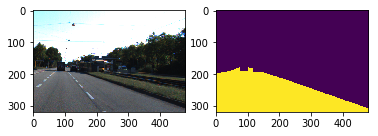

In [2]:
data = KittiRoadLoader(config)
img, mask = data.get_data_element("all_data",0)
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(mask)
plt.show()

In [3]:
sess = tf.Session()
model = FcnAlexnetModel(config)
model.build()
logger = Logger(sess,config)
trainer = RoadTrainer(sess,model,data,config,logger)
model.load(sess)
trainer.train()

Epoch  0


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:32<00:00,  2.11s/it]


-->Last epoch loss     :  1.3071792
-->Last epoch accuracy :  0.28236338
-->Last test loss      :  0.744682
-->Last test accuracy  :  0.5634511
Saving model...
Model saved
[BEST LOST : 0.7446820139884949]
Epoch  1


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:30<00:00,  2.10s/it]


-->Last epoch loss     :  0.81709623
-->Last epoch accuracy :  0.48121765
-->Last test loss      :  0.71944606
-->Last test accuracy  :  0.5965308
Saving model...
Model saved
[BEST LOST : 0.719446063041687]
Epoch  2


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:30<00:00,  2.10s/it]


-->Last epoch loss     :  0.7919202
-->Last epoch accuracy :  0.48259297
-->Last test loss      :  0.6607959
-->Last test accuracy  :  0.5779976
Saving model...
Model saved
[BEST LOST : 0.6607959270477295]
Epoch  3


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:30<00:00,  2.16s/it]


-->Last epoch loss     :  0.7262824
-->Last epoch accuracy :  0.5392592
-->Last test loss      :  0.6668304
-->Last test accuracy  :  0.5783302
Epoch  4


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:30<00:00,  2.10s/it]


-->Last epoch loss     :  0.72980034
-->Last epoch accuracy :  0.5136238
-->Last test loss      :  0.7634728
-->Last test accuracy  :  0.517626
Epoch  5


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:30<00:00,  2.09s/it]


-->Last epoch loss     :  0.66954404
-->Last epoch accuracy :  0.56711525
-->Last test loss      :  0.5514139
-->Last test accuracy  :  0.6689447
Saving model...
Model saved
[BEST LOST : 0.551413893699646]
Epoch  6


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:29<00:00,  2.10s/it]


-->Last epoch loss     :  0.50433564
-->Last epoch accuracy :  0.6745482
-->Last test loss      :  0.41332826
-->Last test accuracy  :  0.759941
Saving model...
Model saved
[BEST LOST : 0.41332826018333435]
Epoch  7


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:30<00:00,  2.10s/it]


-->Last epoch loss     :  0.566272
-->Last epoch accuracy :  0.6305867
-->Last test loss      :  0.48737177
-->Last test accuracy  :  0.67661643
Epoch  8


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:30<00:00,  2.11s/it]


-->Last epoch loss     :  0.5229367
-->Last epoch accuracy :  0.6476953
-->Last test loss      :  0.3860877
-->Last test accuracy  :  0.78039604
Saving model...
Model saved
[BEST LOST : 0.38608768582344055]
Epoch  9


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [03:31<00:00,  2.11s/it]


-->Last epoch loss     :  0.48879778
-->Last epoch accuracy :  0.65849435
-->Last test loss      :  0.43362877
-->Last test accuracy  :  0.72978324


Loading model checkpoint ./experiments\fcn_alexnet_kittiroad\checkpoint/-900 ...

INFO:tensorflow:Restoring parameters from ./experiments\fcn_alexnet_kittiroad\checkpoint/-900
Model loaded


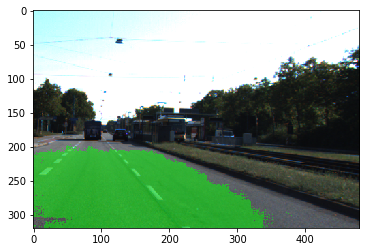

Accuracy :  0.8281282


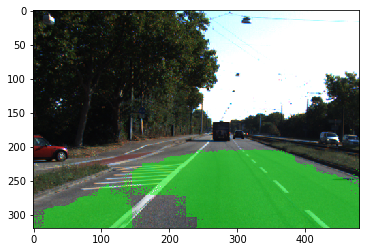

Accuracy :  0.8328119


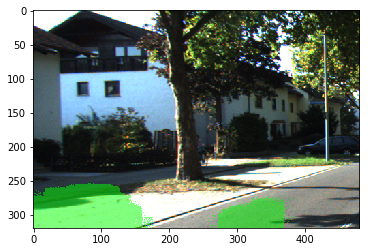

Accuracy :  0.41286555


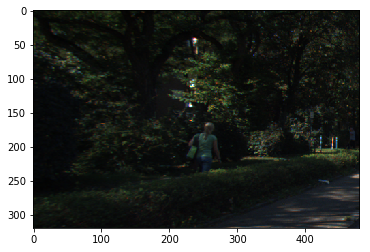

Accuracy :  0.0017123701


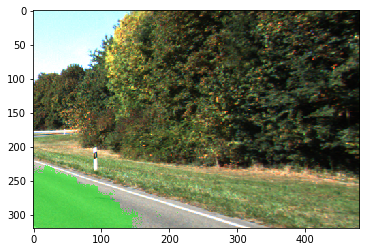

Accuracy :  0.7598038


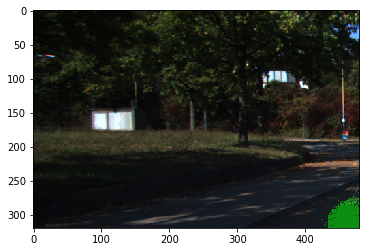

Accuracy :  0.5396493


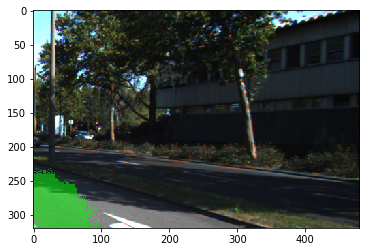

Accuracy :  0.6404991


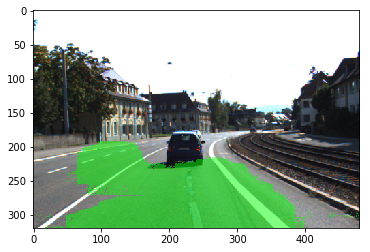

Accuracy :  0.782903


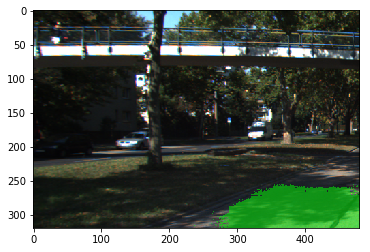

Accuracy :  0.73395056


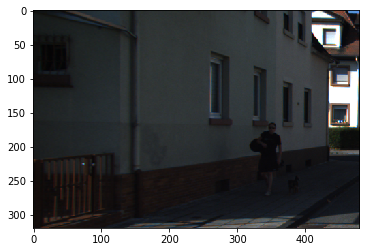

Accuracy :  0.37754303


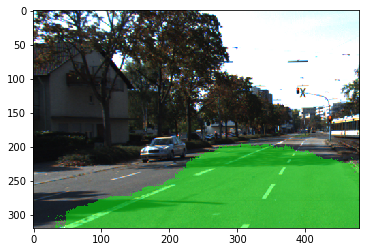

Accuracy :  0.8080811


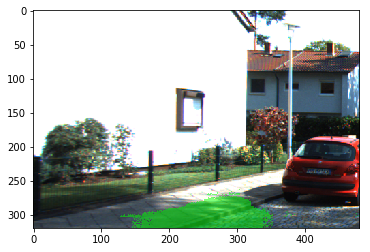

Accuracy :  0.00010092525


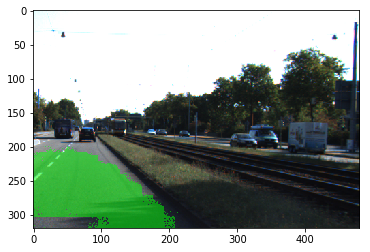

Accuracy :  0.77178365


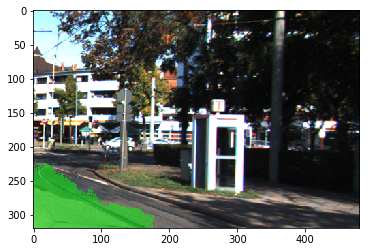

Accuracy :  0.6911357


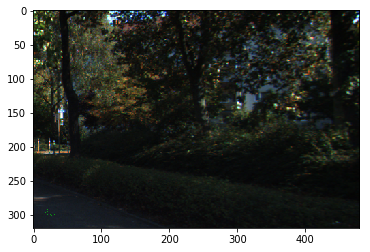

Accuracy :  0.00086019636


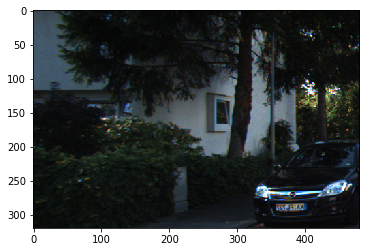

Accuracy :  0.0064015556


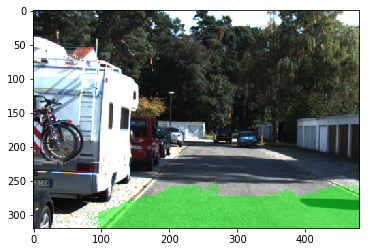

Accuracy :  0.7308715


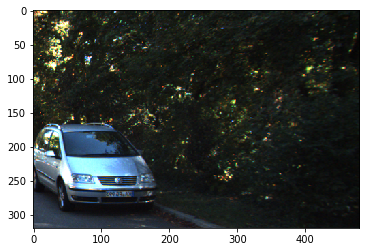

Accuracy :  0.16115755


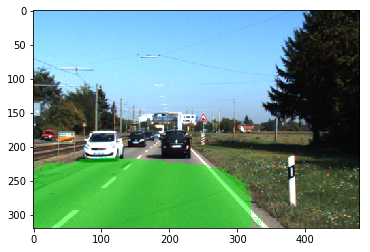

Accuracy :  0.8836633


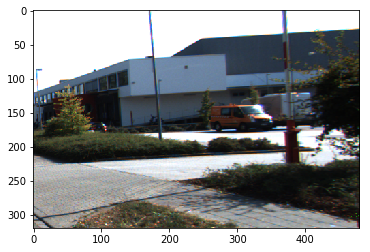

Accuracy :  0.049420487


In [4]:
test = [data.get_data_element("all_data",i) for i in range(20)]
model.load(sess)
for item in test :
    img = item[0]
    mask = item[1]
    model.predict(sess,img,mask)

In [5]:
sess.close()